<a href="https://colab.research.google.com/github/nv-github1/my-repo1/blob/master/AAL_Sales_Analysis_Nandita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sales Analysis
Problem Statement:

AAL, established in 2000, is a well-known brand in Australia, particularly recognized for its clothing business. It has opened branches in various states, metropolises, and tier-1 and tier-2 cities across the country.
The brand caters to all age groups, from kids to the elderly.


Currently experiencing a surge in business, AAL is actively pursuing expansion opportunities. To facilitate informed investment decisions, the CEO has assigned the responsibility to the head of AAL’s sales and marketing (S&M) department. The specific tasks include:

Identify the states that are generating the highest revenues.
Develop sales programs for states with lower revenues. The head of sales and marketing has requested your assistance with this task.
Analyze the sales data of the company for the fourth quarter in Australia, examining it on a state-by-state basis. Provide insights to assist the company in making data-driven decisions for the upcoming year.

*Enclosed is the CSV (AusApparalSales4thQrt2020.csv) file that covers the said data.

Input dataset: DatasetLinks to an external site.

Perform the following steps:
As a data scientist, you must perform the following steps on the enclosed data:

Data wrangling
Data analysis
Data visualization
Report generation


Data wrangling
Ensure that the data is clean and free from any missing or incorrect entries.
Inspect the data manually to identify missing or incorrect information using the functions isna() and notna().
Based on your knowledge of data analytics, include your recommendations for treating missing and incorrect data (dropping the null values or filling them).
Choose a suitable data wrangling technique—either data standardization or normalization. Execute the preferred normalization method and present the resulting data. (Normalization is the preferred approach for this problem.)
Share your insights regarding the application of the GroupBy() function for either data chunking or merging, and offer a recommendation based on your analysis.
  2. Data analysis

Perform descriptive statistical analysis on the data in the Sales and Unit columns. Utilize techniques such as mean, median, mode, and standard deviation for this analysis.
Identify the group with the highest sales and the group with the lowest sales based on the data provided.
Identify the group with the highest and lowest sales based on the data provided.
Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted.
(Use suitable libraries such as NumPy, Pandas, and SciPy for performing the analysis.)
  3. Data visualization

Use suitable data visualization libraries to construct a dashboard for the head of sales and marketing. The dashboard should encompass key parameters:
State-wise sales analysis for different demographic groups (kids, women, men, and seniors).
Group-wise sales analysis (Kids, Women, Men, and Seniors) across various states.
Time-of-the-day analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams. This information aids in designing programs like hyper-personalization and Next Best Offers to enhance sales.
Ensure the visualization is clear and accessible for effective decision-making by the head of sales and marketing (S&M).
The dashboard must contain daily, weekly, monthly, and quarterly charts.
(Any visualization library can be used for this purpose. However, since statistical analysis is being done, Seaborn is preferred.)
Include your recommendation and indicate why you are choosing the recommended visualization package.
  4. Report generation

Use JupyterLab Notebook for generating reports, which includes tasks such as data wrangling, analysis, and visualization. Please note that JupyterLab enables you to integrate code seamlessly with graphs and plots.
Use Markdown in suitable places while presenting your report.
Use suitable graphs, plots, and analysis reports in the report, along with recommendations. Note that various aspects of analysis require different graphs and plots.
Use a box plot for descriptive statistics.
Use the Seaborn distribution plot for any other statistical plotting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# path -  /content/drive/MyDrive/datascience/AusApparalSales4thQrt2020.csv

# Load the data
df_AusApparel = pd.read_csv('/content/drive/MyDrive/datascience/AusApparalSales4thQrt2020.csv')

print('Aus Apparel data is now loaded')
print(df_AusApparel.head())
print(df_AusApparel.tail())
print(df_AusApparel.info())
print(df_AusApparel.describe())

print("Shape:", df_AusApparel.shape)
print("Columns: ", df_AusApparel.columns.tolist())

Aus Apparel data is now loaded
         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500
             Date        Time State     Group  Unit  Sales
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000
7556  30-Dec-2020     Evening   TAS      Kids    15  37500
7557  30-Dec-2020     Evening   TAS       Men    15  37500
7558  30-Dec-2020     Evening   TAS     Women    11  27500
7559  30-Dec-2020     Evening   TAS   Seniors    13  32500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object

In [3]:
# remove extra spaces in the columns with text

df_AusApparel['State'] = df_AusApparel['State'].str.strip()
df_AusApparel['Group'] = df_AusApparel['Group'].str.strip()
df_AusApparel['Time'] = df_AusApparel['Time'].str.strip()

print(df_AusApparel.head())



         Date       Time State    Group  Unit  Sales
0  1-Oct-2020    Morning    WA     Kids     8  20000
1  1-Oct-2020    Morning    WA      Men     8  20000
2  1-Oct-2020    Morning    WA    Women     4  10000
3  1-Oct-2020    Morning    WA  Seniors    15  37500
4  1-Oct-2020  Afternoon    WA     Kids     3   7500


In [4]:
# converting Date column to datetime format

df_AusApparel['Date_checked'] = pd.to_datetime(df_AusApparel['Date'], errors='coerce')

# dropping rows with missing dates if any are missing, that is

df_AusApparel = df_AusApparel.dropna(subset=['Date_checked'])

# checking for any missing values

print(df_AusApparel.isna().sum())



Date            0
Time            0
State           0
Group           0
Unit            0
Sales           0
Date_checked    0
dtype: int64


In [5]:
print("Shape:", df_AusApparel.shape)
print("Columns: ", df_AusApparel.columns.tolist())

Shape: (7560, 7)
Columns:  ['Date', 'Time', 'State', 'Group', 'Unit', 'Sales', 'Date_checked']


In [6]:
# using Normalization technique as suggested in the project specification

df_AusApparel['Unit_norm'] = (df_AusApparel['Unit'] - df_AusApparel['Unit'].min()) / (df_AusApparel['Unit'].max() - df_AusApparel['Unit'].min())
df_AusApparel['Sales_norm'] = (df_AusApparel['Sales'] - df_AusApparel['Sales'].min()) / (df_AusApparel['Sales'].max() - df_AusApparel['Sales'].min())

print("Shape:", df_AusApparel.shape)
print("Columns: ", df_AusApparel.columns.tolist())

Shape: (7560, 9)
Columns:  ['Date', 'Time', 'State', 'Group', 'Unit', 'Sales', 'Date_checked', 'Unit_norm', 'Sales_norm']


In [7]:
#applying the groupby function without sorting - becomes alphabetic by State, Group and Time, not by the sales
# wanted to see what is the output when there is no sorting, by default

state_total_sales = df_AusApparel.groupby('State')['Sales'].sum()
group_total_sales = df_AusApparel.groupby('Group')['Sales'].sum()
time_sales = df_AusApparel.groupby('Time')['Sales'].sum()

print("\n Total Sales by State: ", state_total_sales)
print("\n Total Sales by Group: ",group_total_sales)
print("\n Total Sales by Time of sales: ",time_sales)


 Total Sales by State:  State
NSW     74970000
NT      22580000
QLD     33417500
SA      58857500
TAS     22760000
VIC    105565000
WA      22152500
Name: Sales, dtype: int64

 Total Sales by Group:  Group
Kids       85072500
Men        85750000
Seniors    84037500
Women      85442500
Name: Sales, dtype: int64

 Total Sales by Time of sales:  Time
Afternoon    114007500
Evening      112087500
Morning      114207500
Name: Sales, dtype: int64


In [8]:
#applying the groupby function, sorted in descending order of total sales
# This sorting - ascending or descending, helps in understanding the sales trend

state_total_sales = df_AusApparel.groupby('State')['Sales'].sum().sort_values(ascending=False)
group_total_sales = df_AusApparel.groupby('Group')['Sales'].sum().sort_values(ascending=False)
time_sales = df_AusApparel.groupby('Time')['Sales'].sum().sort_values(ascending=False)

print("\n Total Sales by State: ", state_total_sales)
print("\n Total Sales by Group: ",group_total_sales)
print("\n Total Sales by Time of sales: ",time_sales)


 Total Sales by State:  State
VIC    105565000
NSW     74970000
SA      58857500
QLD     33417500
TAS     22760000
NT      22580000
WA      22152500
Name: Sales, dtype: int64

 Total Sales by Group:  Group
Men        85750000
Women      85442500
Kids       85072500
Seniors    84037500
Name: Sales, dtype: int64

 Total Sales by Time of sales:  Time
Morning      114207500
Afternoon    114007500
Evening      112087500
Name: Sales, dtype: int64


In [9]:
#applying the groupby function, sorted in ascending order of total sales

state_total_sales = df_AusApparel.groupby('State')['Sales'].sum().sort_values(ascending=True)
group_total_sales = df_AusApparel.groupby('Group')['Sales'].sum().sort_values(ascending=True)
time_sales = df_AusApparel.groupby('Time')['Sales'].sum().sort_values(ascending=True)

print("\n Total Sales by State: ", state_total_sales)
print("\n Total Sales by Group: ",group_total_sales)
print("\n Total Sales by Time of sales: ",time_sales)


 Total Sales by State:  State
WA      22152500
NT      22580000
TAS     22760000
QLD     33417500
SA      58857500
NSW     74970000
VIC    105565000
Name: Sales, dtype: int64

 Total Sales by Group:  Group
Seniors    84037500
Kids       85072500
Women      85442500
Men        85750000
Name: Sales, dtype: int64

 Total Sales by Time of sales:  Time
Evening      112087500
Afternoon    114007500
Morning      114207500
Name: Sales, dtype: int64


In [10]:
# will check now how the sales has changed over time

daily_sales = df_AusApparel.set_index('Date_checked')['Sales'].resample('D').sum()
weekly_sales = df_AusApparel.set_index('Date_checked')['Sales'].resample('W-MON').sum()
monthly_sales = df_AusApparel.set_index('Date_checked')['Sales'].resample('ME').sum()
quarterly_sales = df_AusApparel.set_index('Date_checked')['Sales'].resample('QE').sum()

print("\n Daily Sales: ", daily_sales)
print("\n Weekly Sales: ", weekly_sales)
print("\n Monthly Sales: ", monthly_sales)
print("\n Quarterly Sales: ", quarterly_sales)




 Daily Sales:  Date_checked
2020-10-01    3720000
2020-10-02    3715000
2020-10-03    3890000
2020-10-04    3720000
2020-10-05    3862500
               ...   
2020-12-26    4715000
2020-12-27    4637500
2020-12-28    4595000
2020-12-29    4607500
2020-12-30    4590000
Freq: D, Name: Sales, Length: 91, dtype: int64

 Weekly Sales:  Date_checked
2020-10-05    18907500
2020-10-12    26935000
2020-10-19    26805000
2020-10-26    26590000
2020-11-02    20797500
2020-11-09    21065000
2020-11-16    21242500
2020-11-23    21187500
2020-11-30    21442500
2020-12-07    30817500
2020-12-14    32060000
2020-12-21    31247500
2020-12-28    32007500
2021-01-04     9197500
Freq: W-MON, Name: Sales, dtype: int64

 Monthly Sales:  Date_checked
2020-10-31    114290000
2020-11-30     90682500
2020-12-31    135330000
Freq: ME, Name: Sales, dtype: int64

 Quarterly Sales:  Date_checked
2020-12-31    340302500
Freq: QE-DEC, Name: Sales, dtype: int64


In [11]:
# getting a statistical summary - we discussed this yesterday (Oct 15th)
# as a group in the breakout room, so trying it out here

summary = {
    'Mean Sales': df_AusApparel['Sales'].mean(),
    'Median Sales': df_AusApparel['Sales'].median(),
    'Mode Sales': df_AusApparel['Sales'].mode().tolist(),
    'Standard Deviation': df_AusApparel['Sales'].std()
}
print(summary)
print(df_AusApparel['Sales'].describe())
print('\n Mean Sales: ', df_AusApparel['Sales'].mean())
print('\n Median Sales: ', df_AusApparel['Sales'].median())
print('\n Mode Sales: ', df_AusApparel['Sales'].mode())
print('\n Standard Deviation: ', df_AusApparel['Sales'].std())



{'Mean Sales': np.float64(45013.5582010582), 'Median Sales': 35000.0, 'Mode Sales': [22500], 'Standard Deviation': 32253.506943966317}
count      7560.000000
mean      45013.558201
std       32253.506944
min        5000.000000
25%       20000.000000
50%       35000.000000
75%       65000.000000
max      162500.000000
Name: Sales, dtype: float64

 Mean Sales:  45013.5582010582

 Median Sales:  35000.0

 Mode Sales:  0    22500
Name: Sales, dtype: int64

 Standard Deviation:  32253.506943966317


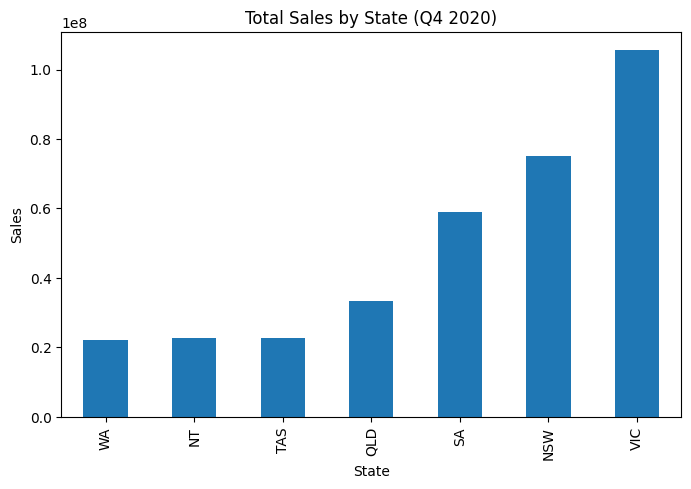

In [12]:
# creating all the visualizations

# Total sales by state

plt.figure(figsize=(8,5))
state_total_sales.plot(kind='bar')
plt.title('Total Sales by State (Q4 2020)')
plt.xlabel('State')
plt.ylabel('Sales')
plt.show()



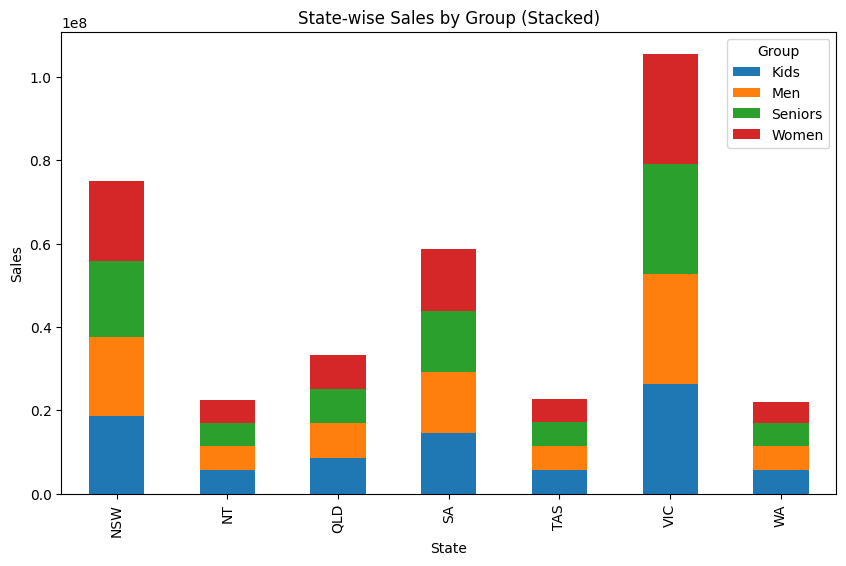

In [13]:
# Group wise sales across states, using groupby

state_group_sales = df_AusApparel.groupby(['State', 'Group'])['Sales'].sum().unstack(fill_value=0)
state_group_sales.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('State-wise Sales by Group (Stacked)')
plt.xlabel('State')
plt.ylabel('Sales')
plt.show()


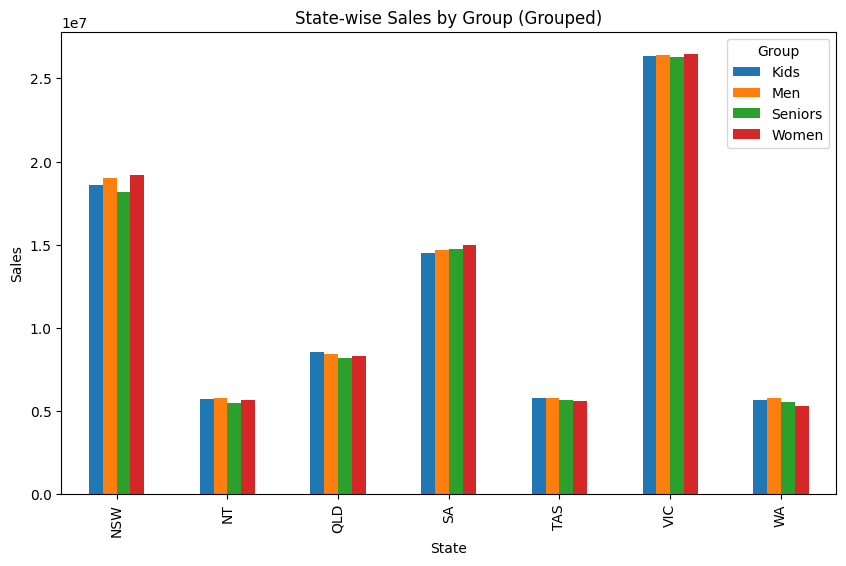

In [14]:
# I tried this first, but then preferred the look of the Stacked plot above.
# but wanted to show what I did at first

state_group_sales.plot(kind='bar', stacked=False, figsize=(10,6))

plt.title('State-wise Sales by Group (Grouped)')
plt.xlabel('State')
plt.ylabel('Sales')
plt.legend(title='Group')
plt.show()

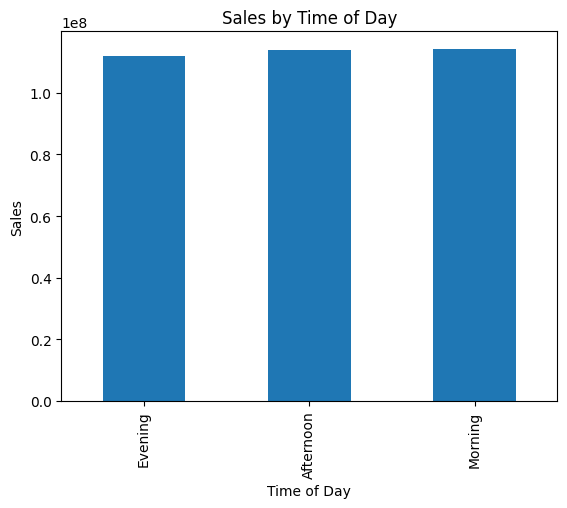

In [15]:
# Sales by time of day

time_sales.plot(kind='bar')
plt.title('Sales by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Sales')
plt.show()

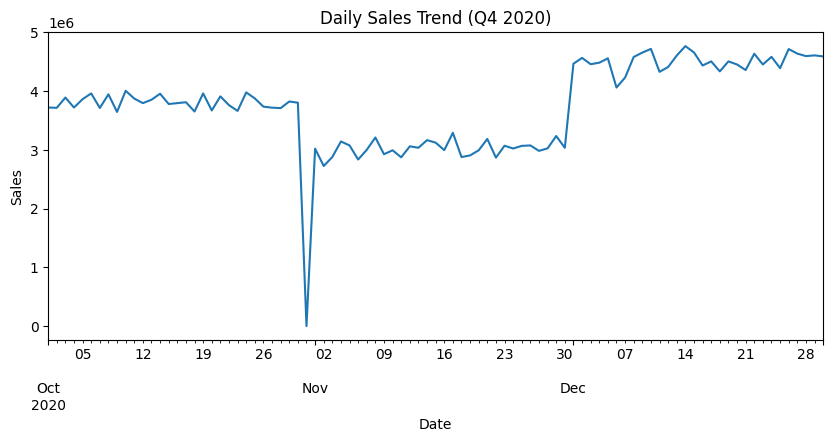

In [16]:
# The daily sales trend

daily_sales.plot(figsize=(10,4))
plt.title('Daily Sales Trend (Q4 2020)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

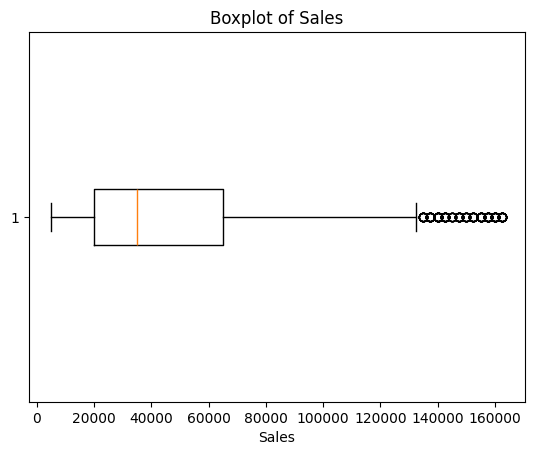

In [17]:
# using boxplot for sales distribution
# I have plotted this but am unable to interpret it as yet. I need to read up on how to do that part.
# I believe the dots or circles on the extreme right are the outliers

plt.boxplot(df_AusApparel['Sales'], vert=False)
plt.title('Boxplot of Sales')
plt.xlabel('Sales')
plt.show()

*Tried the following as a summary. *

**Summary**

**Top-performing states:** those with the highest total sales: VIC, NSW and SA are the top 3.

**Lowest-performing states:** ones at the bottom of the sales chart: WA, NT and TAS are the bottom 3.

**Best performing group:** Women and Men are on par, followed by Kids and then the Seniors.

**Peak sales time:** Sales time during Mornings are slightly higher than in the Afternoon or Evening.

**Trend seen in sales:** Sales seems to be consistent but may increase during weekends or holidays.